# Exercises

---

In [1]:
# connect to git to load all libraries and data

# get all files from the notebook here
!rm -rf population-methods-IT
!git clone https://github.com/irenetiem/population-methods-IT

import numpy as np
from scipy import io
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("population-methods-IT/03-dimensionality-reduction/code"))
from utils import download_data

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})

# download lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/uh8XZNenSfuR2fq')

Cloning into 'population-methods-IT'...
remote: Enumerating objects: 208, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 208 (delta 14), reused 36 (delta 12), pack-reused 160 (from 1)
Receiving objects: 100% (208/208), 17.51 MiB | 12.83 MiB/s, done.
Resolving deltas: 100% (82/82), done.


## Exercise 1: structured and ustructured images
Write a function that outputs the number of PC you have to choose to retain a given percentage of explained variance.
Use this funtion on the  handwritten digit data, and plot the number of PC needed to retain a certain fraction of EVR, for a few vaules of EVR.

Compare this curve to the one you can obtain in unstructured images: either generate images with the same shape of our data or randomly permute the pixels in each image independenlty. How does the number of PC needed to retain a certain fraction of the variance in this case compare to the number needed for digit images?

In [2]:
# function to output the number of PC to choose to retain a given percentage
# of explained variance

def num_PC(dataset, percentage):
  """func that returns the number of PC to choose to retain a given percentage
  of explained variance

  input
  dataset: eg. MNIST digit data
  percentage: float, perfered percentage"""

  # load the data and perform PCA
  images = dataset.data

  scaler = StandardScaler()
  X =scaler.fit_transform(images)

  pca = PCA()
  pca.fit(X)

  total = 0

  for i in range(len(pca.explained_variance_ratio_)):
    total += pca.explained_variance_ratio_[i]
    if total >= percentage:
      return i+1

# load image data (from notebook)
dataset = load_digits()

num_PC(dataset, 0.9)

31

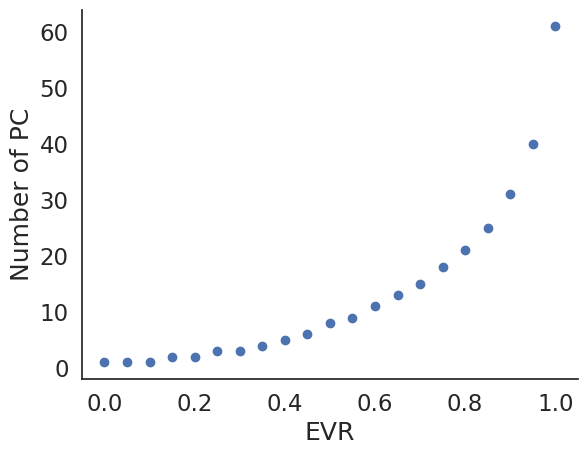

In [18]:
# testing a few EVR
EVR = np.linspace(0, 1, 21)

PC_for_EVR = [num_PC(dataset, EVR[i]) for i in range(len(EVR))]

plt.scatter(EVR, PC_for_EVR)
plt.xlabel('EVR')
plt.ylabel('Number of PC')
plt.show()

(1797, 64)


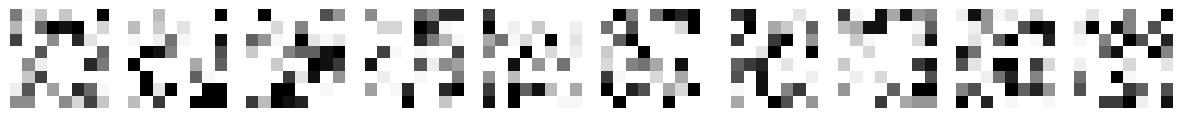

In [15]:
# comparing it with unstructered images by randmly permuting pixels from dataset

# load image data
dataset = load_digits()
images = dataset.data
images_permuted = np.copy(images)

# permute all pixels within single images
for image in range(len(images[0])):
    images_permuted[image] = np.random.permutation(images[image])

#plot first 10 images to check
plt.figure(figsize=(15,7))
for i,img in enumerate(images_permuted[:10]):
    plt.subplot(1,10,i+1)
    plt.imshow(img.reshape(8,8),cmap=plt.cm.Greys)
    plt.axis('off')

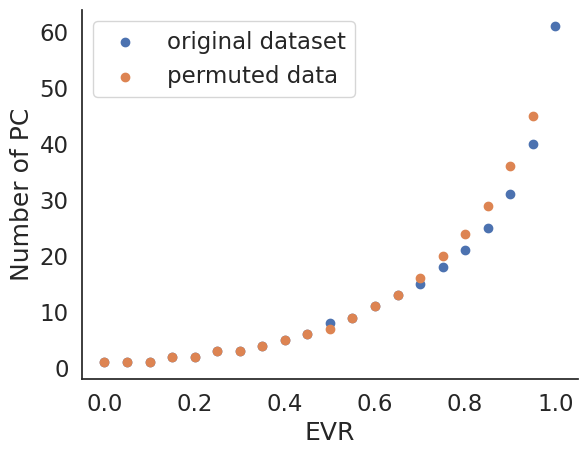

In [19]:
# now do the same for this dataset

PC_for_EVR_perm = [num_PC(images_permuted, EVR[i]) for i in range(len(EVR))]

plt.scatter(EVR, PC_for_EVR, label = 'original dataset')
plt.scatter(EVR, PC_for_EVR_perm, label = 'permuted data')
plt.xlabel('EVR')
plt.ylabel('Number of PC')
plt.legend()
plt.show()

The plots for both the original data and permuted data look very similar, only near the end some small changes are visible, but I think these can be neglected.

## Exercise 2: cortical dynamics

Work with the cortical data we used in the lesson. Write some code that lets you easily chose a specific behavioural event from the `trial_data` dictionary (the recorded events are `CSp` for positive conditioned stimulus, `CSn` for negative conditioned stimulus and `licks` for lick events), one of the principal components, an onset time and and offset time, and plots the timecourse of this component in the selected period around the chosen event type.

Use this code to explore the data: how do different components behave? Do you notice any patterns? How would you test for the statistical significance of the effects that you see (if any)?

## Exercise 3: nonlinear dimensionality reduction

Using the MNIST digit dataset, explore the effect of hyperparameters on the result of nonlinear dimensionality reduction methods.

- Change the `perplexity` and `exageration` parameters in `TNSE` (one at a time). Graphically compare the results of different values.
- Change the neighbourhood size in `Isomap` (set by the parameter `n_neighbors`), and visualize how the results change.

Finally, try to apply one or more of these methods to the cortical data we used in the lessons. How do the data look in two dimensions? Do any cluster seem to appear? Are they robust with respect to hyperparameter choice?